<h1 align="center">Volume 4: Spectral 1.</h1>

    Samuel
    Section 2
    19 January 2023

In [1]:
import numpy as np
import matplotlib
matplotlib.use('nbAgg')
from matplotlib import pyplot as plt
from scipy.interpolate import barycentric_interpolate
from numpy import linalg as la
from scipy.optimize import root
from mpl_toolkits.mplot3d import Axes3D

# Setup

def cheb(N):
    
    x = np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    
    dX = X - X.T
    
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D, x

# Problem 1

Use the differentiation matrix to numerically approximate the derivative of u(x)) on a grid of N Chebychev points where N = 6, 8, and 10.
Then use barycentric interpolation (scipy.interpolate.barycentric_interpolate) to
approximate u0 on a grid of 100 evenly spaced points.
Graphically compare your approximation to the exact derivative

In [2]:
def cheb(N):    
    x = np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)

    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)

    dX = X - X.T

    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D, x #i didn't reverse this

<IPython.core.display.Javascript object>


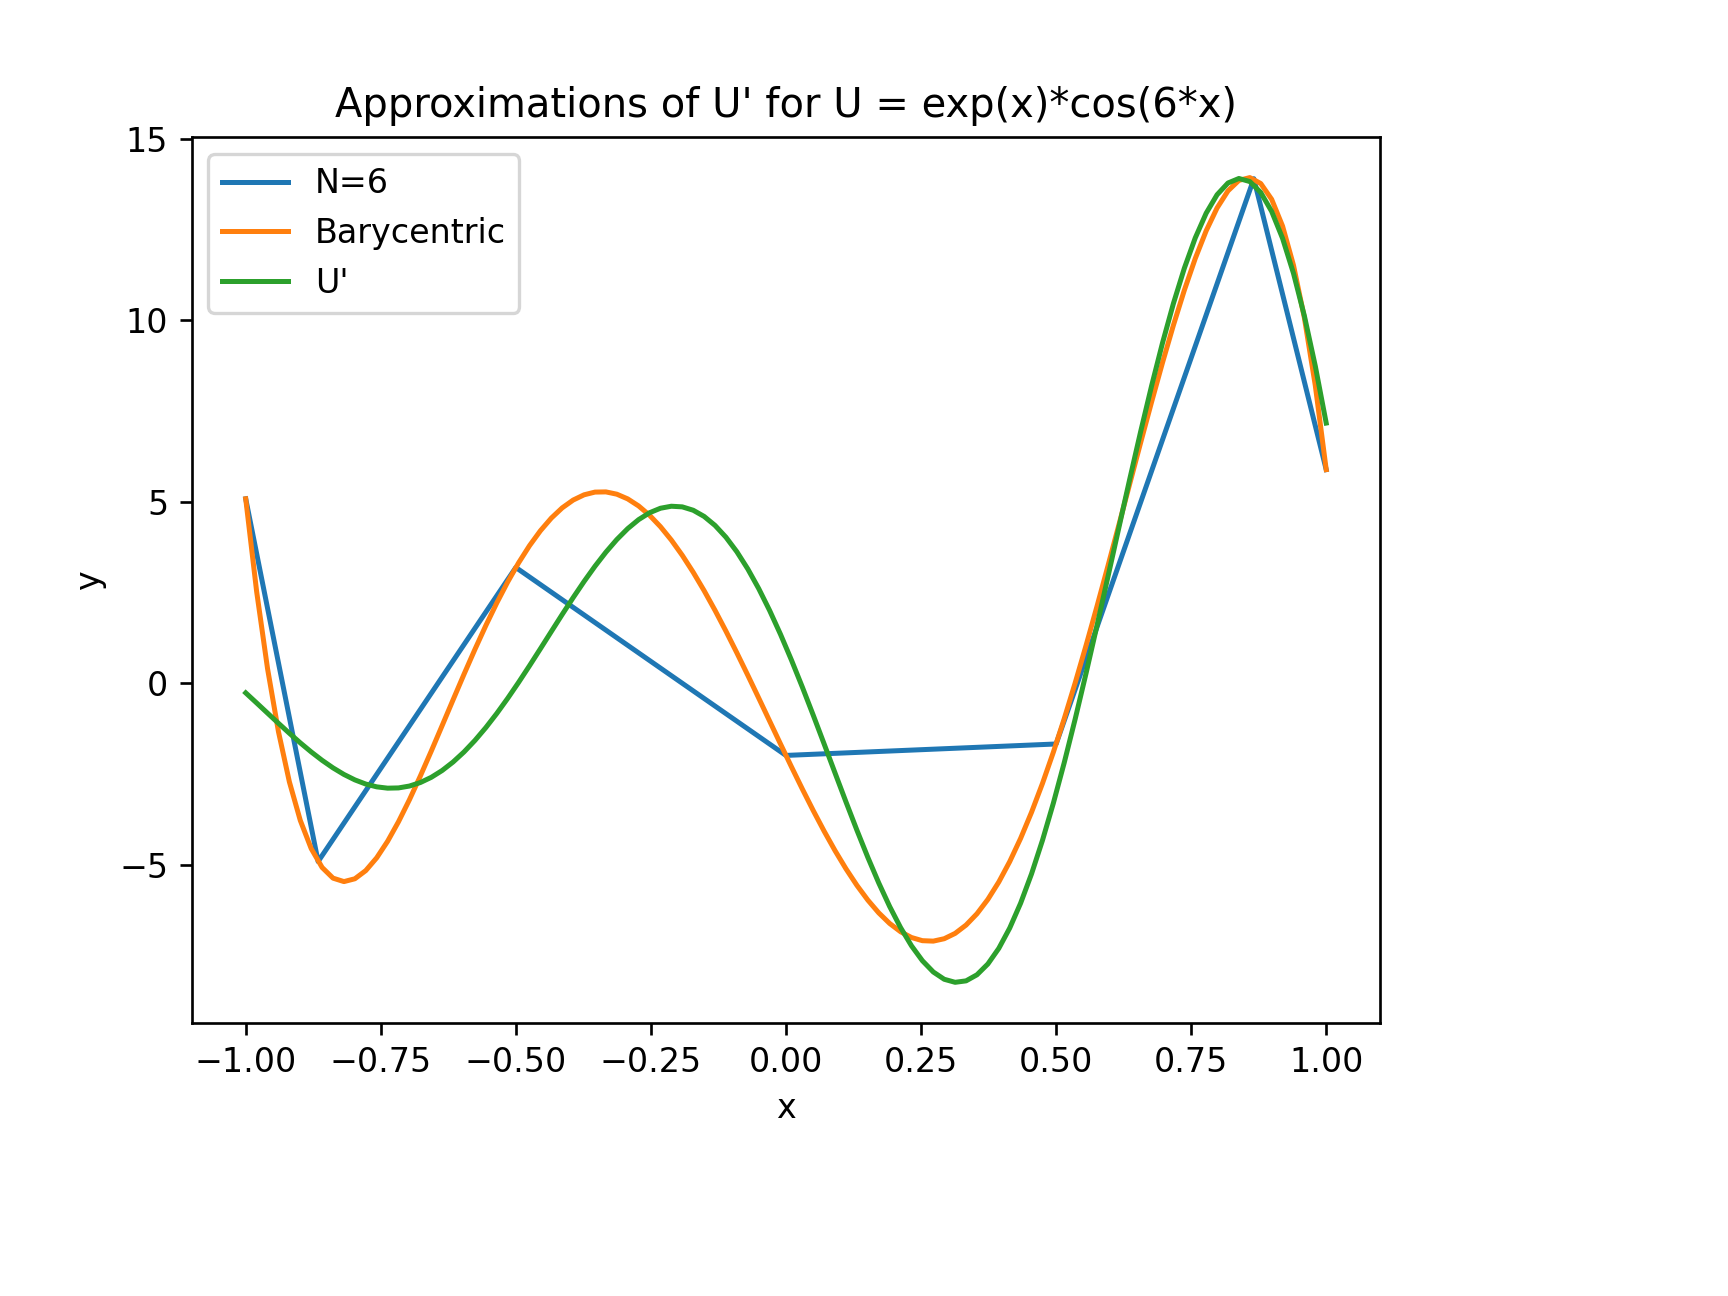

<IPython.core.display.Javascript object>


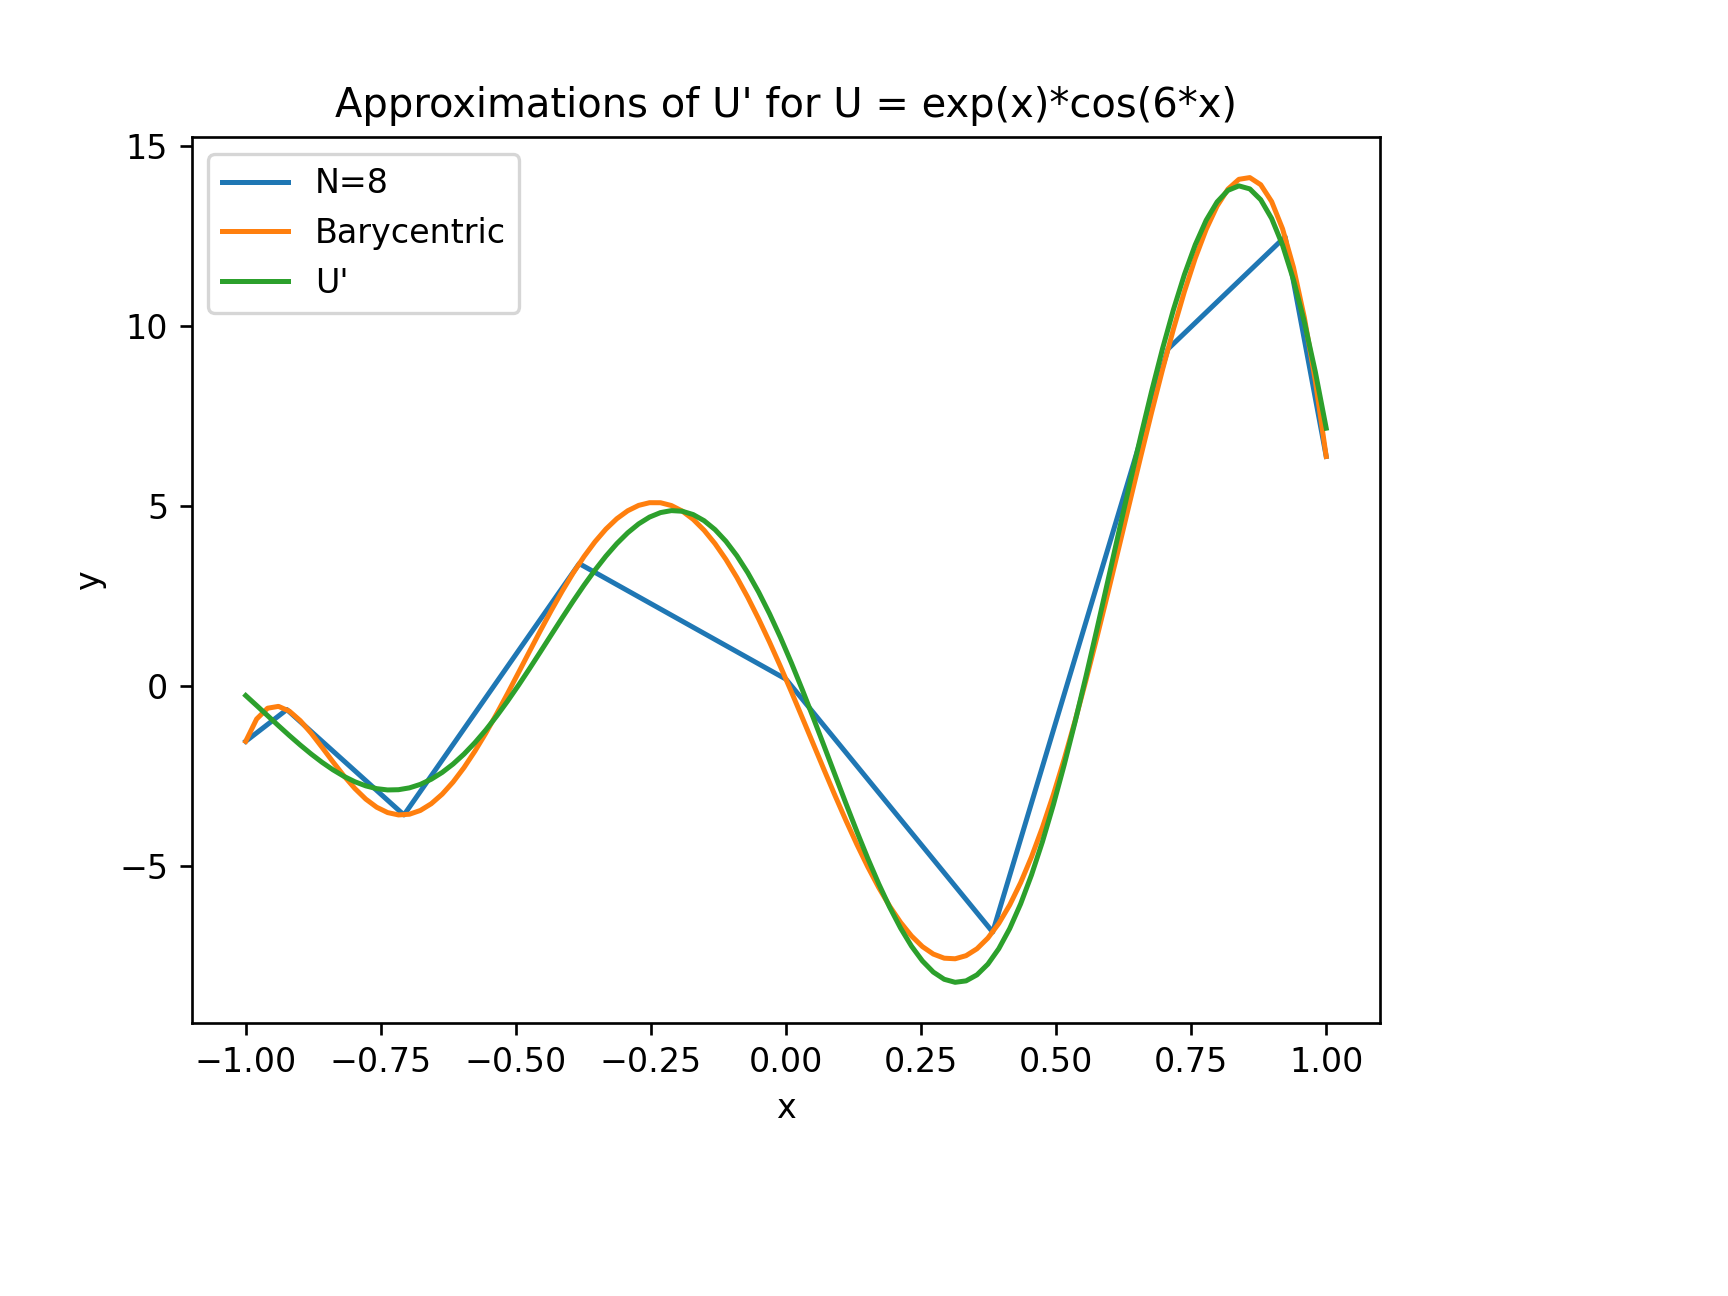

<IPython.core.display.Javascript object>


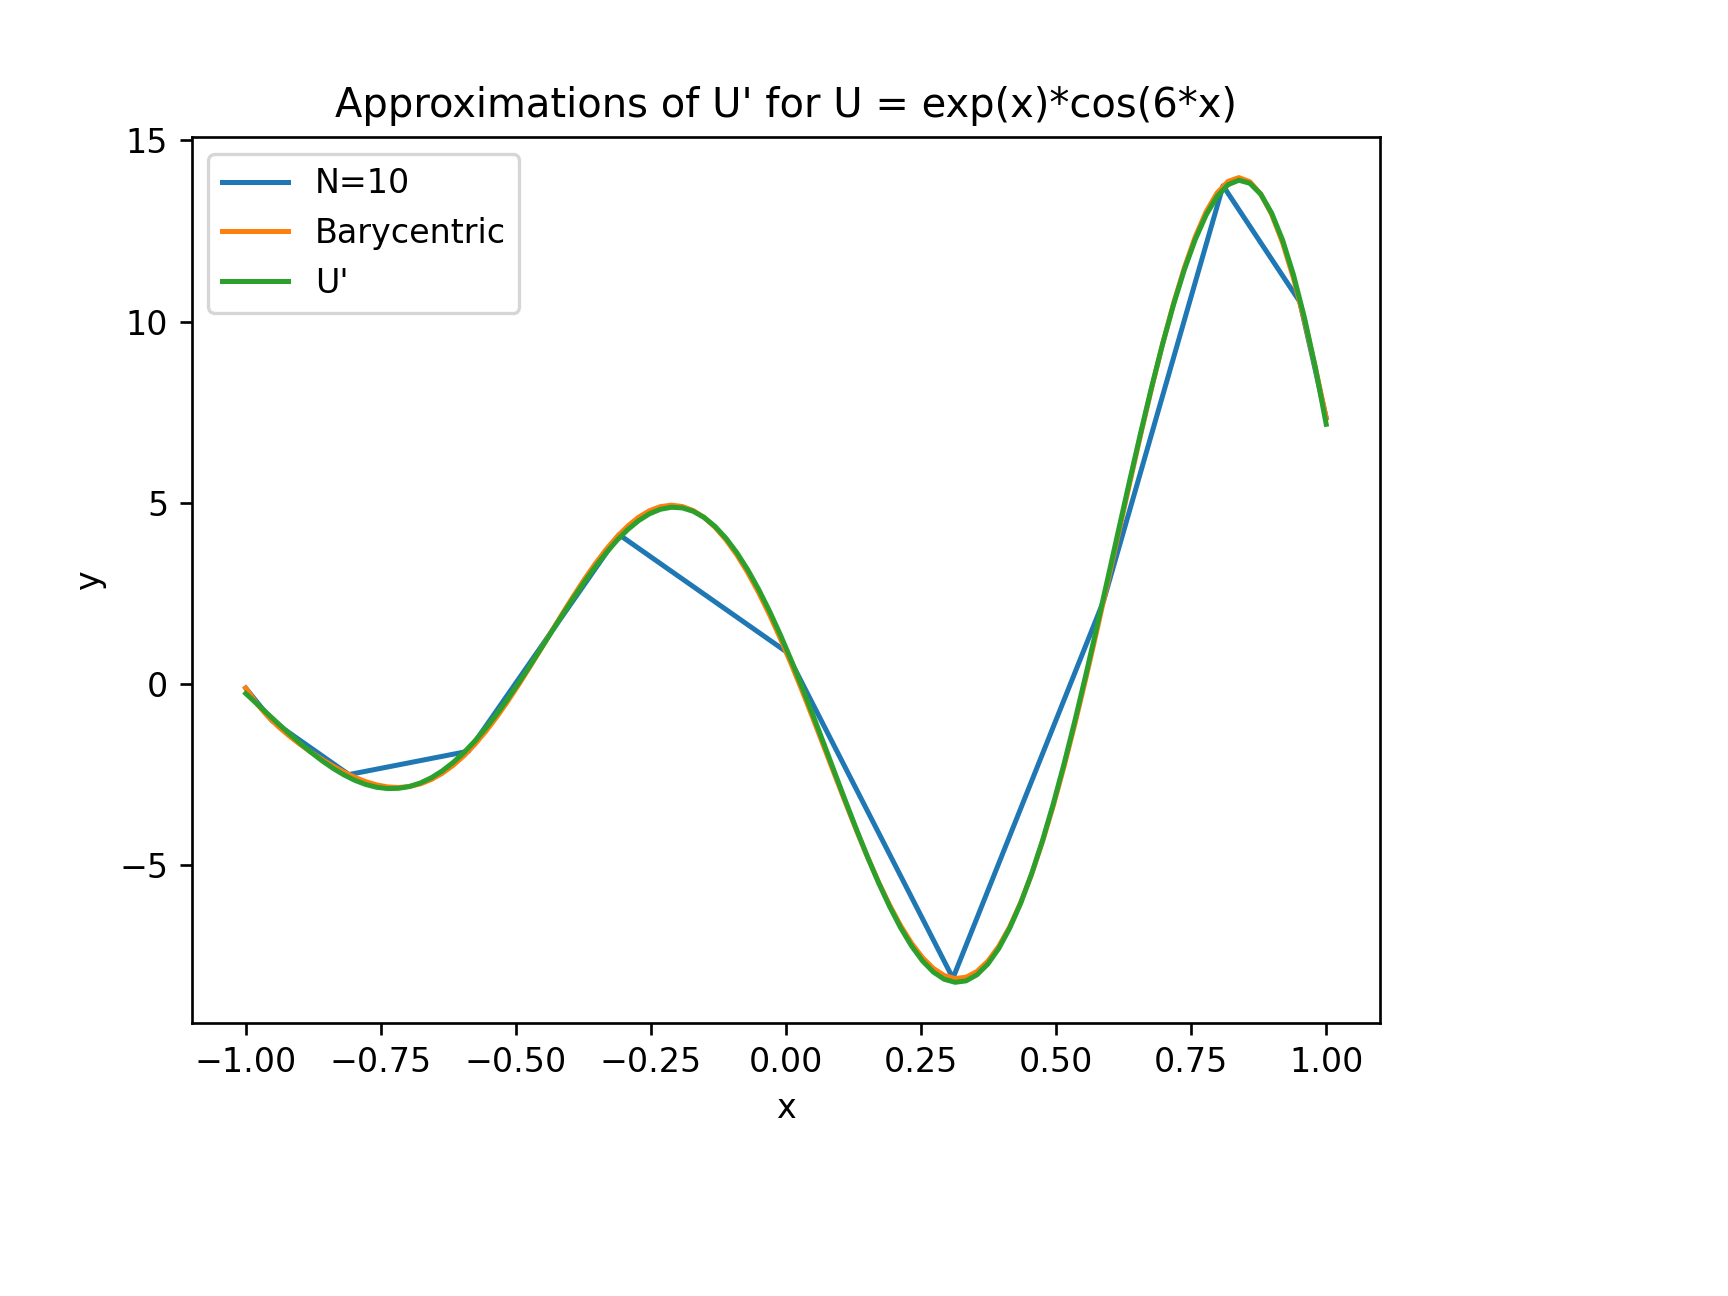

In [3]:
U = lambda x: np.exp(x)*np.cos(6*x)
U_prime = lambda x: np.exp(x)*(np.cos(6*x)-6*np.sin(6*x))

#numerical approximations of derivative for various N
Ns = [6,8,10]
approxs = []
for N in Ns:
    D,x = cheb(N)
    U_prime_approx = D@U(x) #use the differentiation matrix as a linear operator
    x_even = np.linspace(-1,1,100)
    bary_approx = barycentric_interpolate(x,U_prime_approx,x_even)
    #barycentric weights selection algorithm
    plt.plot(x,U_prime_approx,label=f"N={N}")
    plt.plot(x_even,bary_approx,label="Barycentric")
    plt.plot(x_even,U_prime(x_even),label="U'")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Approximations of U' for U = exp(x)*cos(6*x)")
    plt.legend()
    plt.show()

# Problem 2

Use the pseudospectral method to solve the boundary value problem.
Use N = 8 in the cheb(N) method and use barycentric interpolation to approximate u on
100 evenly spaced points. Compare your numerical solution with the exact solution.

<IPython.core.display.Javascript object>


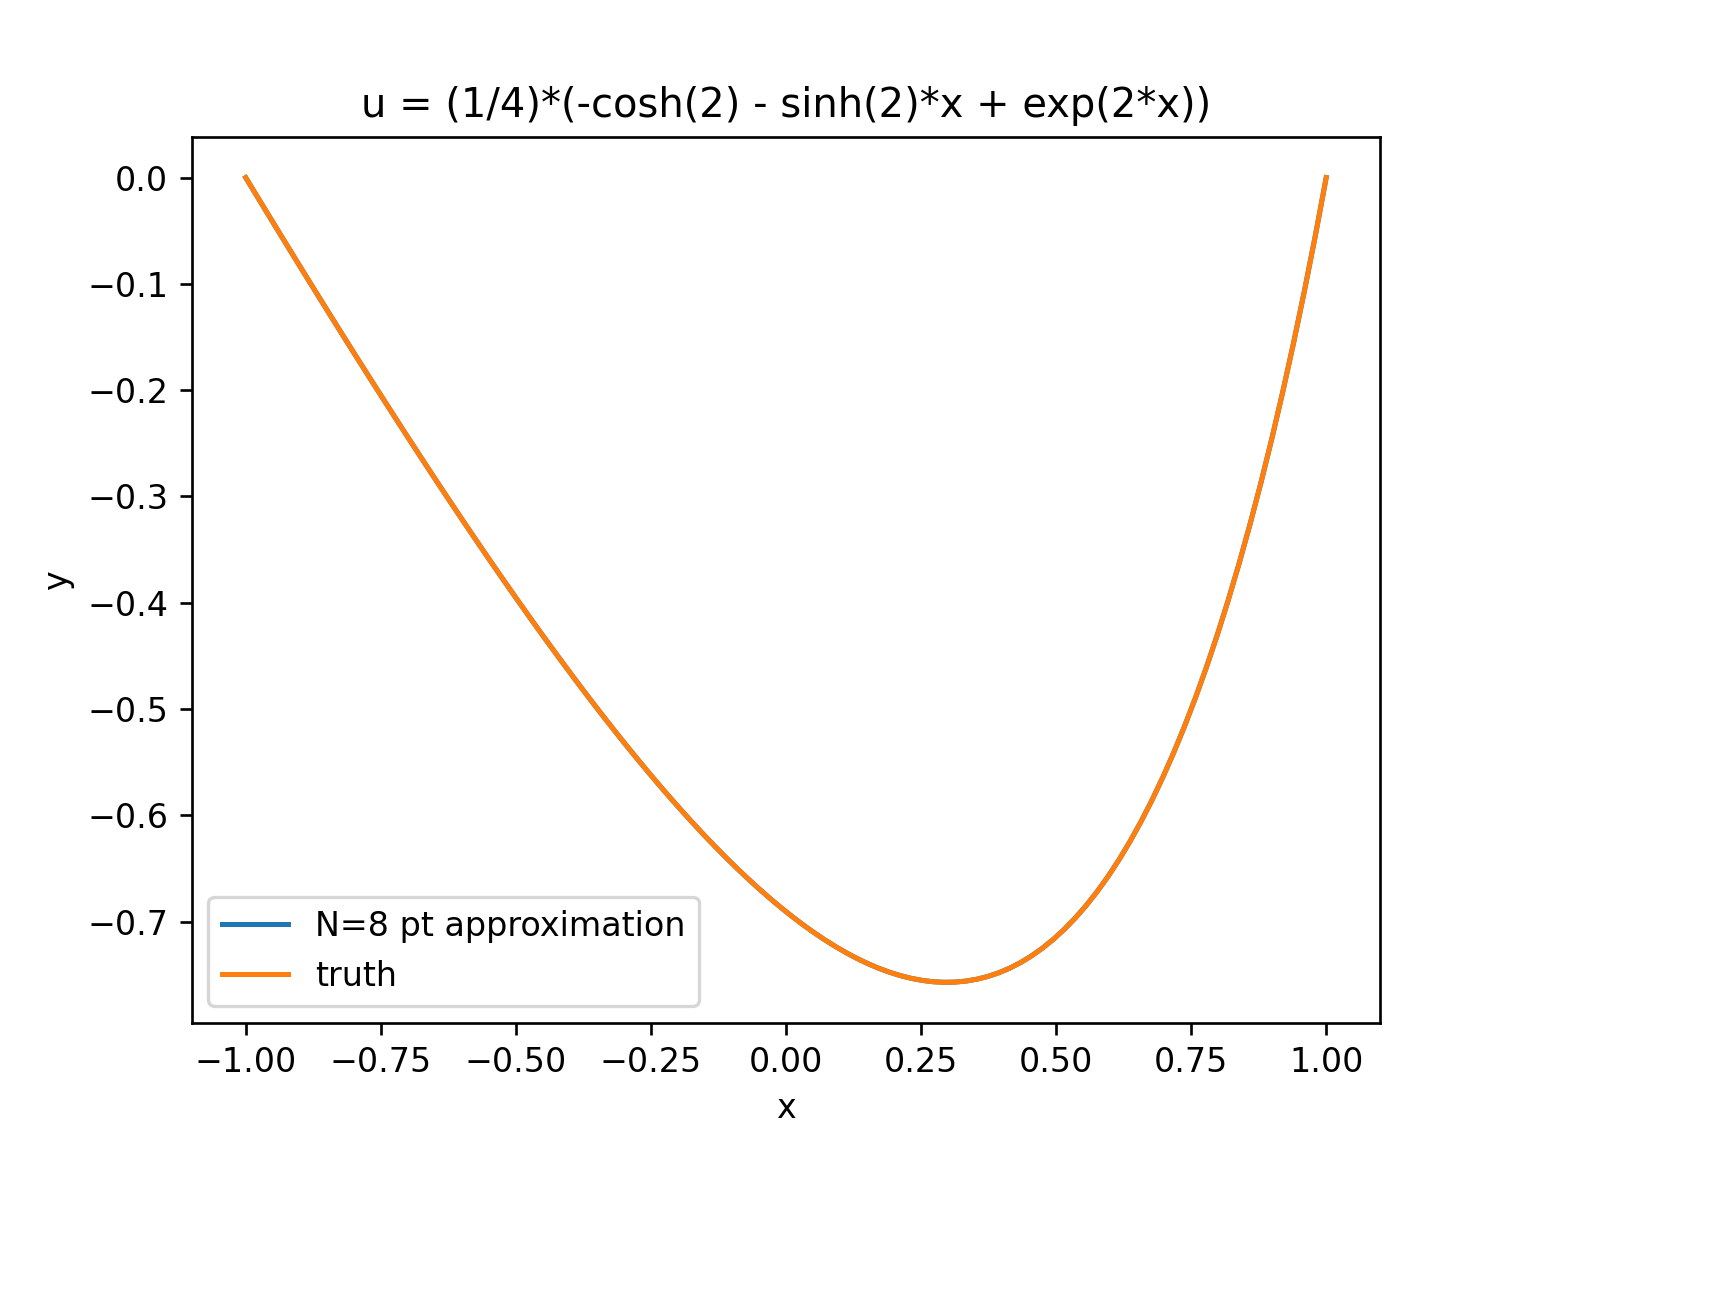

In [19]:
f = lambda x: np.exp(2*x)
u = lambda x: (1/4)*(-np.cosh(2) - np.sinh(2)*x + np.exp(2*x))

N = 8
D,x = cheb(N)
D2 = np.dot(D,D) #second derivative as a linear operator
D2[0,:], D2[-1,:] = 0, 0
D2[0,0], D2[-1,-1] = 1, 1
F = f(x)
F[0], F[-1] = 0, 0 #impose boundary conditions

u_2_prime = la.solve(D2,F) #solving a linear system to get U''

x_even = np.linspace(-1,1,100)
bary_pts = barycentric_interpolate(x,u_2_prime,x_even)


plt.plot(x_even,bary_pts,label=f"N={N} pt approximation")
plt.plot(x_even,u(x_even),label="truth")
plt.legend()
plt.title("u = (1/4)*(-cosh(2) - sinh(2)*x + exp(2*x))")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Problem 3

Use the pseudospectral method to solve the boundary value problem.
Use N = 8 in the cheb(N) method and use barycentric interpolation to approximate u on
100 evenly spaced points.

<IPython.core.display.Javascript object>


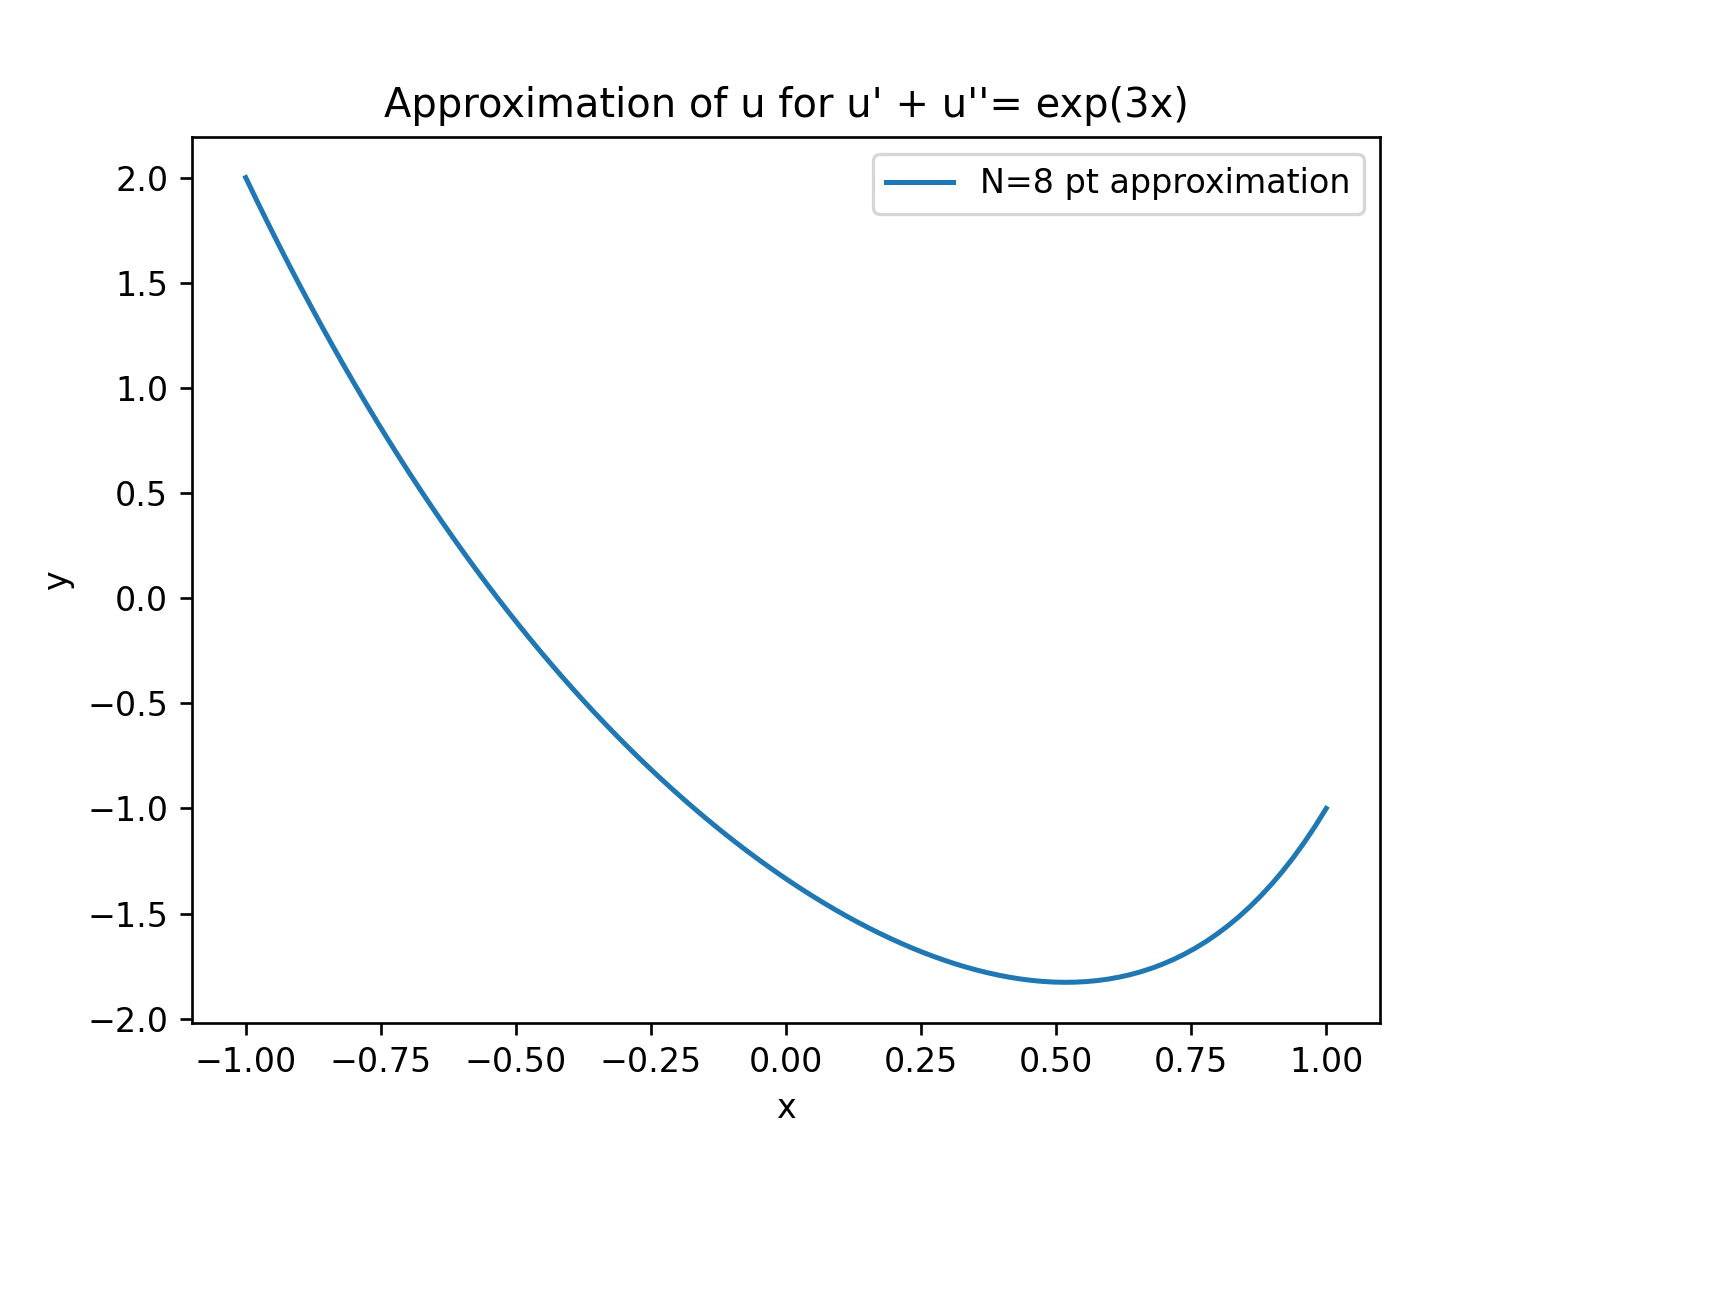

In [22]:
f = lambda x: np.exp(3*x)

N = 8
D,x = cheb(N)
D2 = np.dot(D,D)
L = D + D2 #use equation definition to build linear operator
L[0,:], L[-1,:] = 0, 0
L[0,0], L[-1,-1] = 1, 1
F = f(x)
F[0], F[-1] = -1, 2 #boundary conditions flipped

u_2_prime = la.solve(L,F)

x_even = np.linspace(-1,1,100)
bary_pts = barycentric_interpolate(x,u_2_prime,x_even) #weight selection 


plt.plot(x_even,bary_pts,label=f"N={N} pt approximation")
plt.legend()
plt.title("Approximation of u for u' + u''= exp(3x)")
plt.ylabel('y')
plt.xlabel('x')
plt.show()

# Problem 4

Use the pseudospectral method to solve the boundary value problem
for several values of λ: λ = 4, 8, 12. Begin by transforming this BVP onto the domain −1 <
x < 1. Use N = 20 in the cheb(N) method and use barycentric interpolation to approximate
u on 100 evenly spaced points

<IPython.core.display.Javascript object>


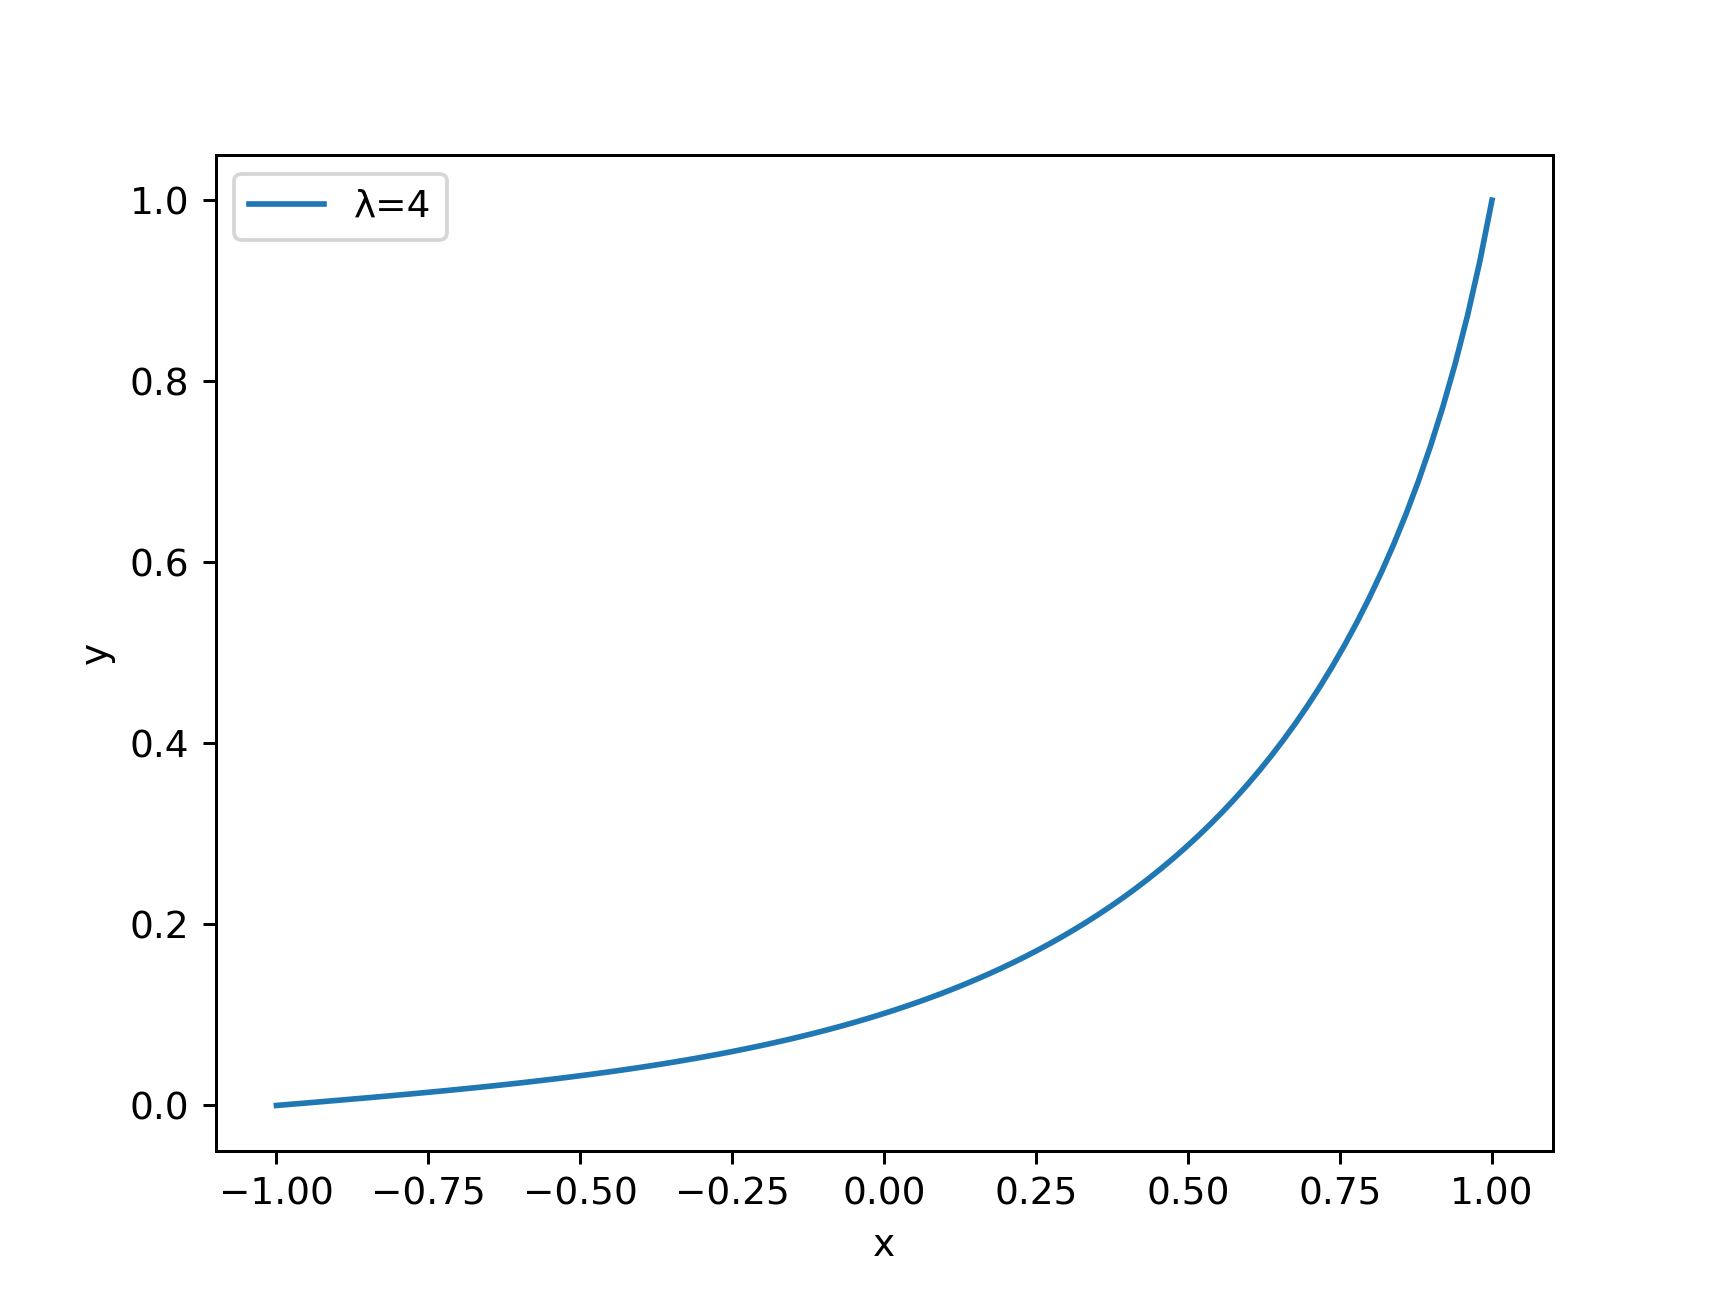

<IPython.core.display.Javascript object>


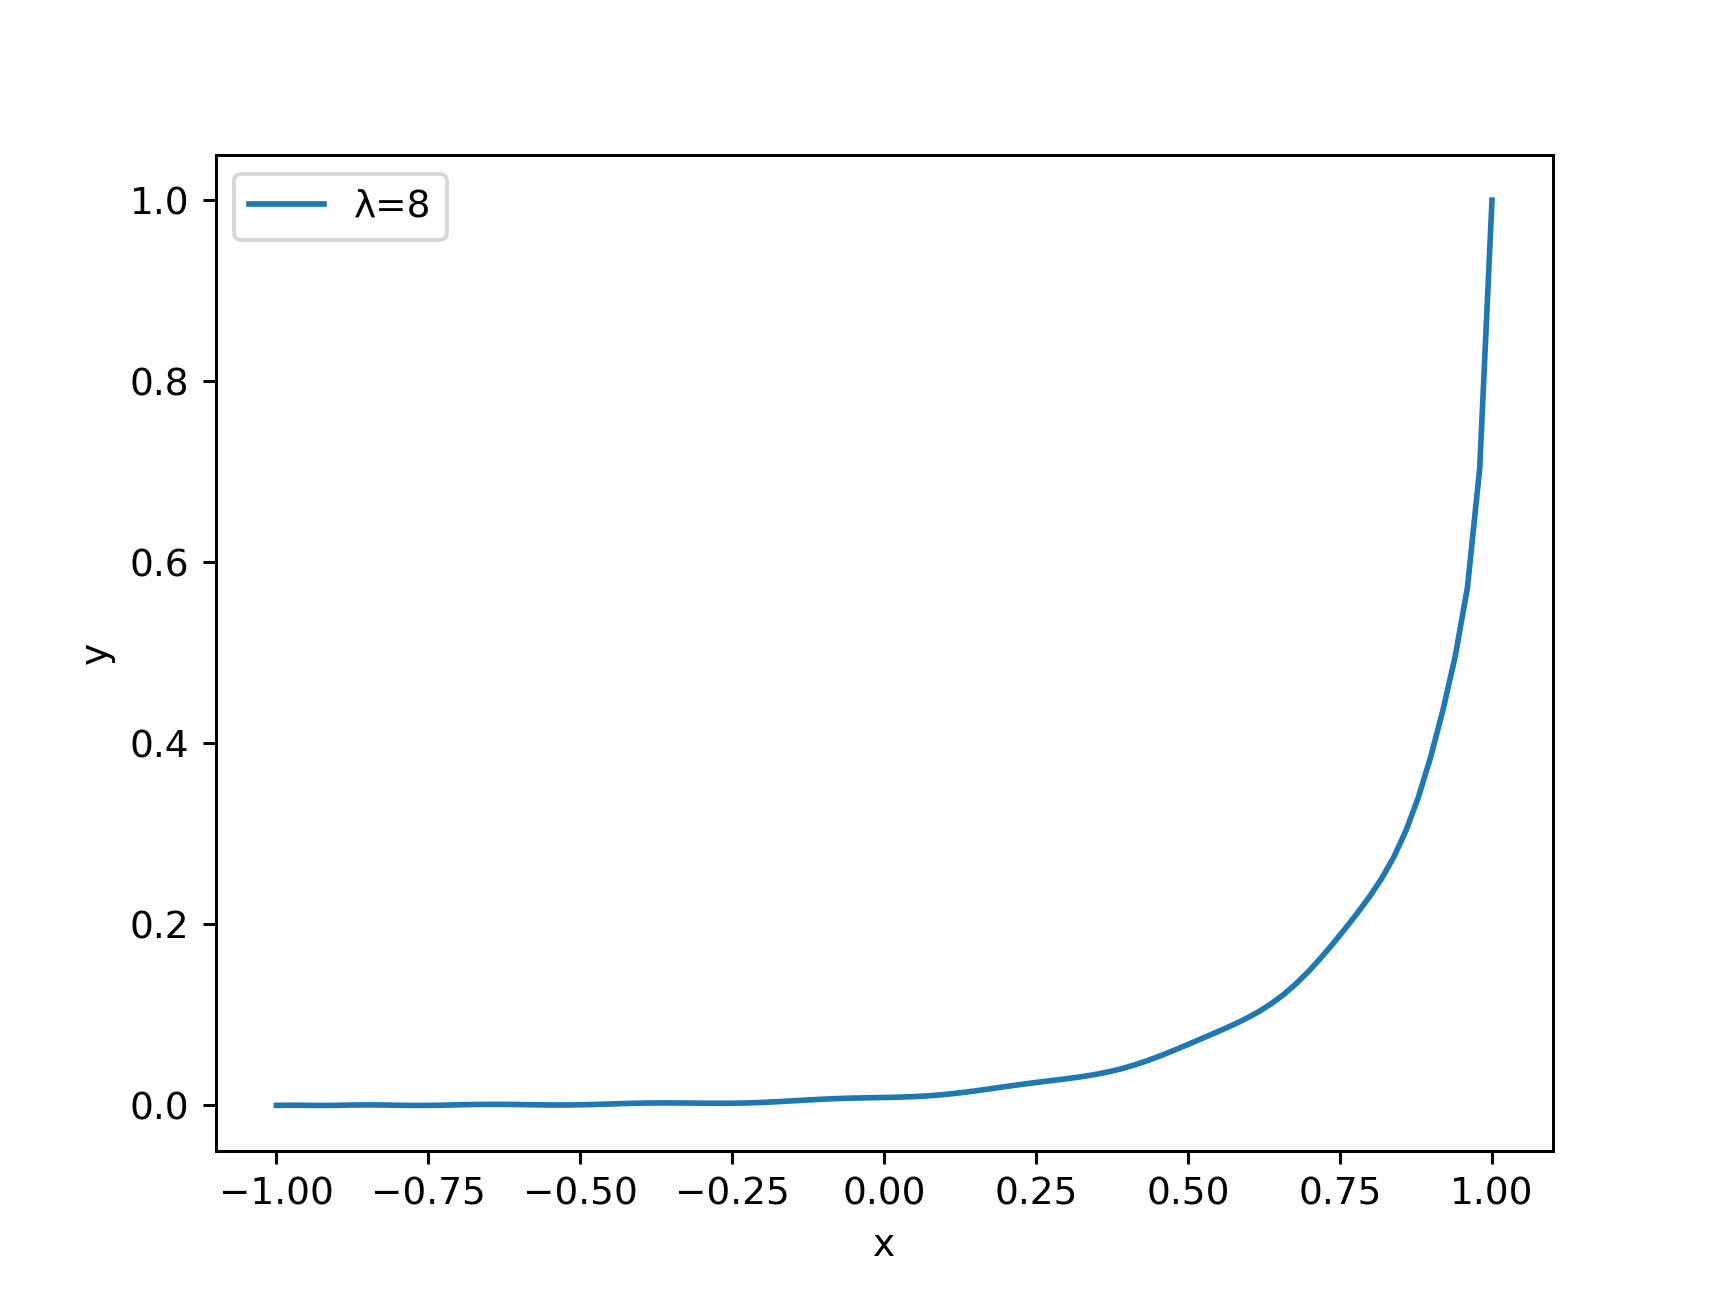

<IPython.core.display.Javascript object>


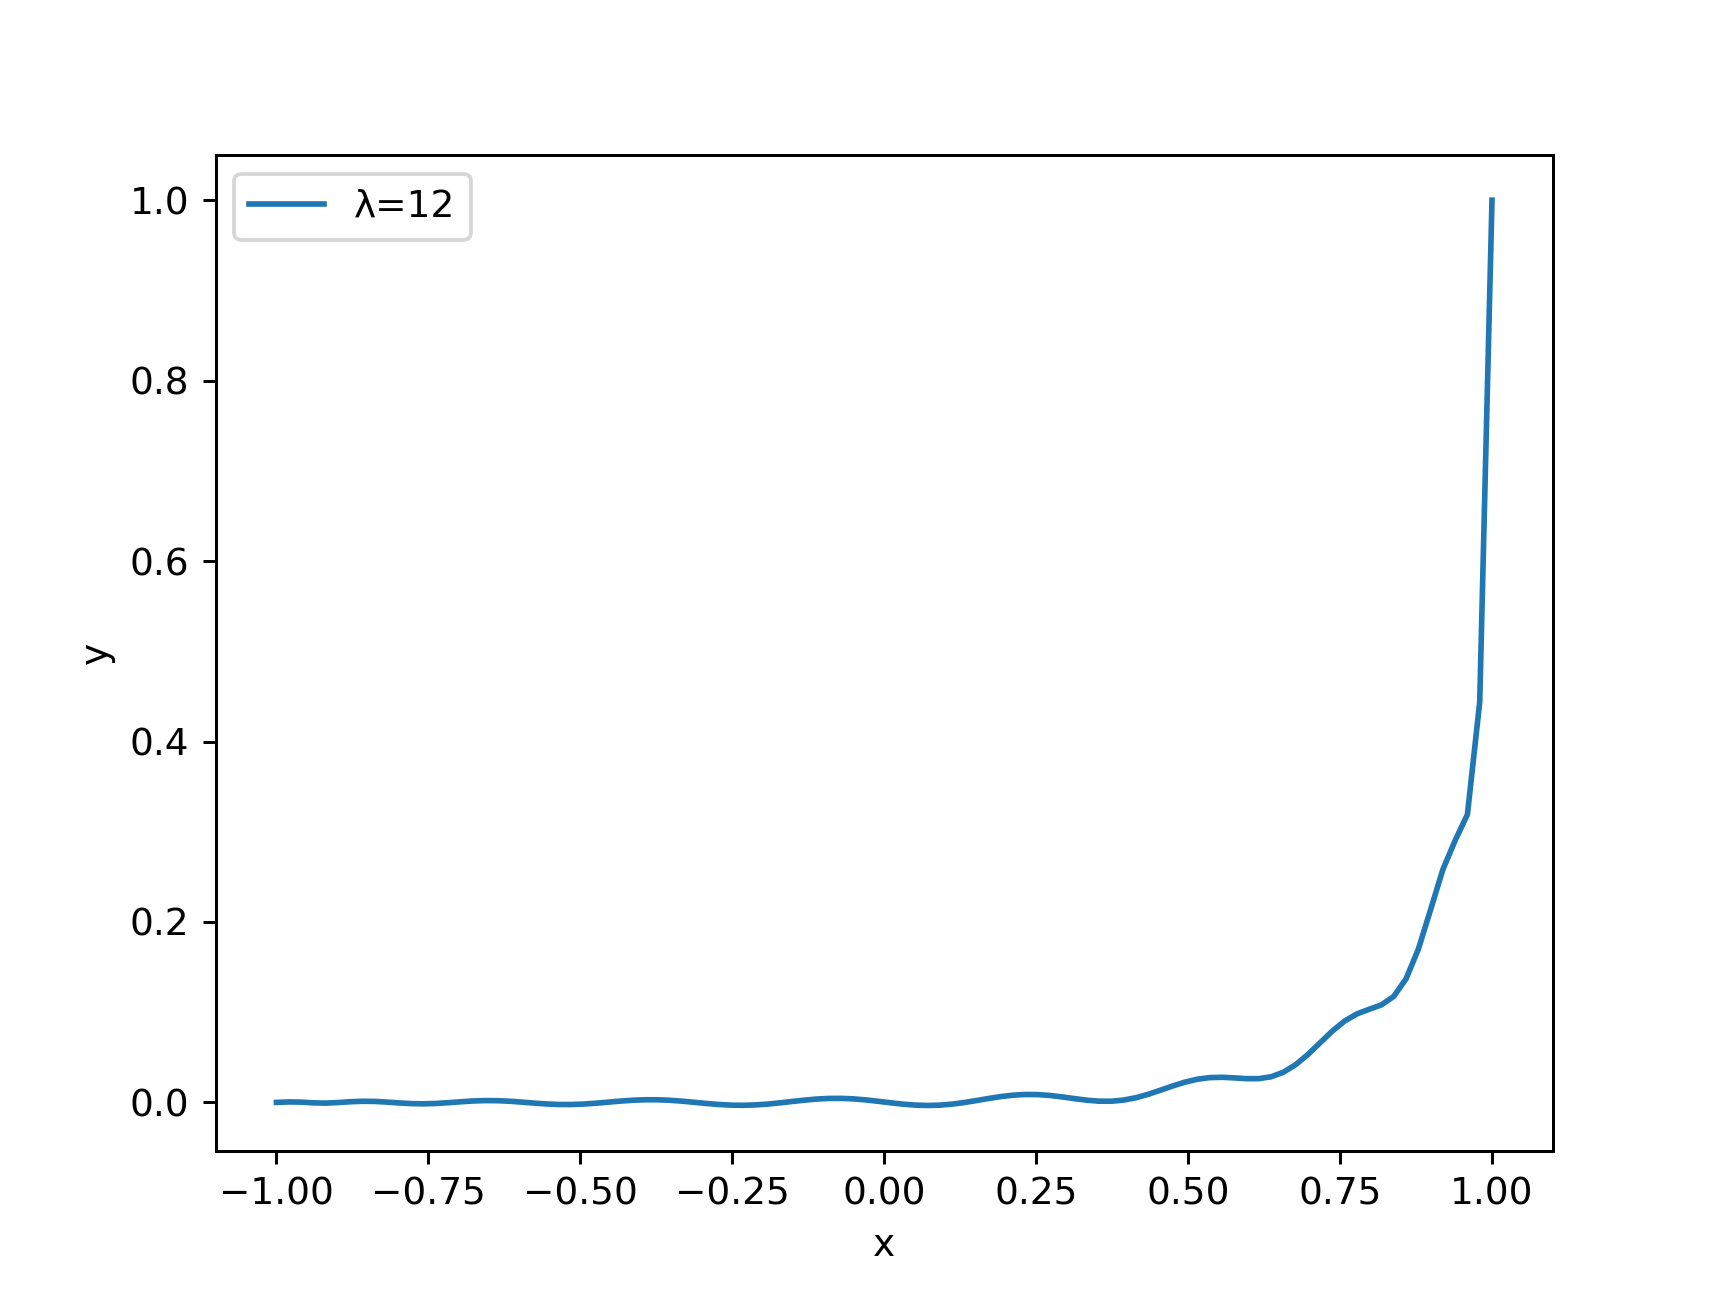

In [41]:
cheb_a,cheb_b = -1,1
N = 20
D,x = cheb(20)
λs = [4,8,12]
D2 = np.dot(D,D)
D2[0,:], D2[-1,:] = 0, 0
D2[0,0], D2[-1,-1] = 1, 1

def F(U): #prepare to implement Newton's method
    out = D2@U-(1/4)*λ*np.sinh(λ*U)
    out[0], out[-1] = U[-1]-0, U[0]-1 #transform to interval
    return out

for λ in λs:
    guess = np.ones(N+1)
    guess[0], guess[-1] = 0,1
    soln = root(F,guess).x #use Newton's method

    x_even = np.linspace(x[0],x[-1],100)
    bary_pts = barycentric_interpolate(x,soln,x_even)

    plt.plot(x_even,bary_pts,label=f"λ={λ}")
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Problem 5

Find the function y(x) that satisies y(−1) = 1, y(1) = 7, and whose surface of
revolution (about the x-axis) minimizes surface area. Compute the surface area, and plot the
surface. Use N = 50 in the cheb(N) method and use barycentric interpolation to approximate
u on 100 evenly spaced points.
Below is sample code for creating the 3D wireframe figure.

C:\Users\sgold\AppData\Local\Temp/ipykernel_30284/2060449505.py:26: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


<IPython.core.display.Javascript object>


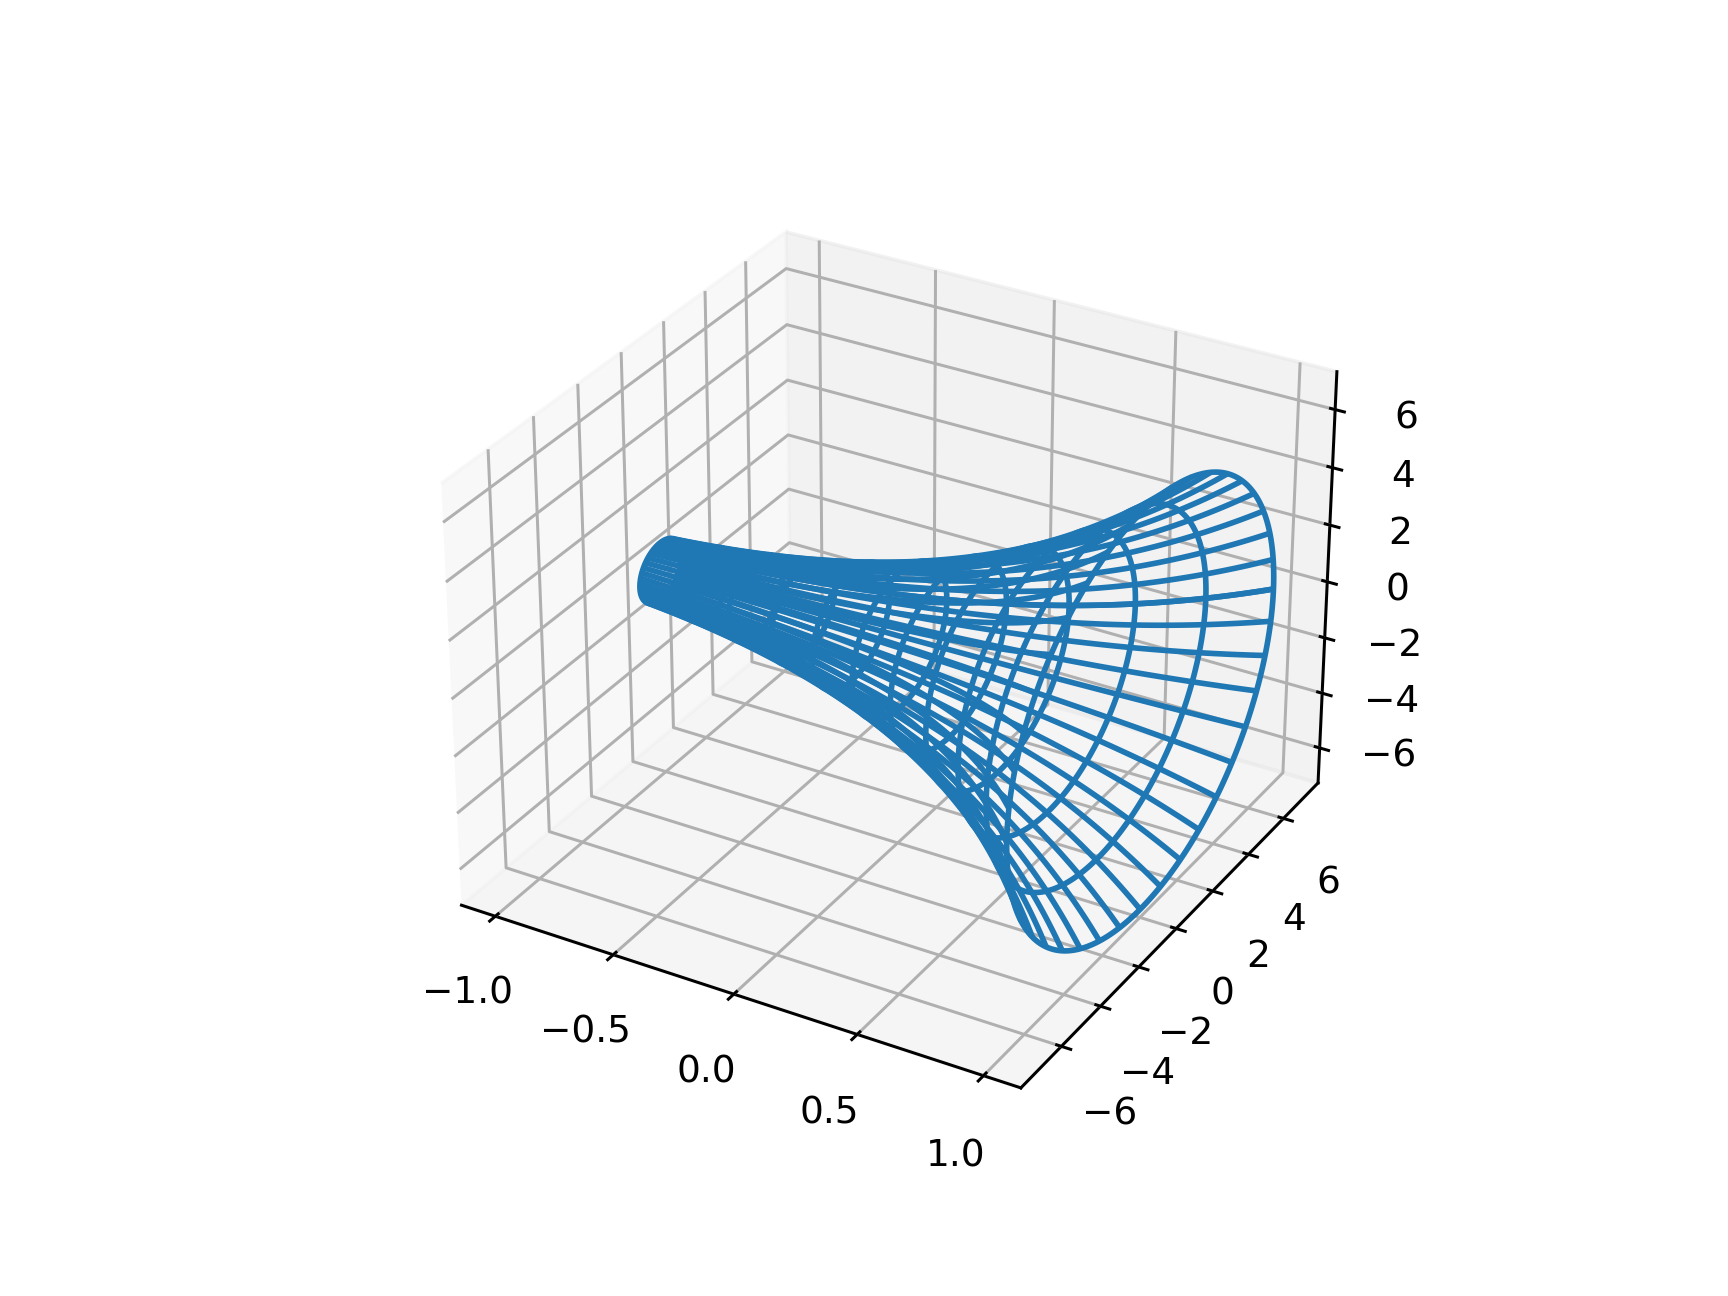

In [46]:
N = 50
D,x = cheb(N)
D2 = np.dot(D,D)
D2[0,:], D2[-1,:] = 0, 0
D2[0,0], D2[-1,-1] = 1, 1


def F(Y):
    out = np.multiply(Y,D2@Y) - np.multiply(D@Y,D@Y) - np.ones(D.shape[0])
    out[-1], out[0] = Y[0]-1, Y[-1]-7 #transform to interval
    return out

guess = np.ones(N+1)*2 #this guess results in gaster convergence
soln = root(F,guess).x #use newton's method

x_even = np.linspace(x[0],x[-1],100)
barycentric = barycentric_interpolate(x,soln,x_even)

lin = np.linspace(-1, 1, 100)
theta = np.linspace(0,2*np.pi,401)
X, T = np.meshgrid(lin, theta)
Y, Z = barycentric*np.cos(T), barycentric*np.sin(T)
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
plt.show()